In [1]:


%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as s
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle

In [2]:
df = pd.read_csv('data.csv')

In [4]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

((569, 33), None)

In [5]:
df = df.drop('Unnamed: 32', axis=1)

In [6]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df.diagnosis = df.diagnosis.astype('category')

In [8]:
X = df.drop(labels='diagnosis',axis=1)
Y= df['diagnosis']
col=X.columns

In [9]:
X.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
Y.isnull().sum()

0

In [11]:

# X = mms.transform(X)

df_norm = (X - X.mean()) / (X.max() - X.min())
df_norm = pd.concat([df_norm, Y], axis=1)

# Visualization

<AxesSubplot:>

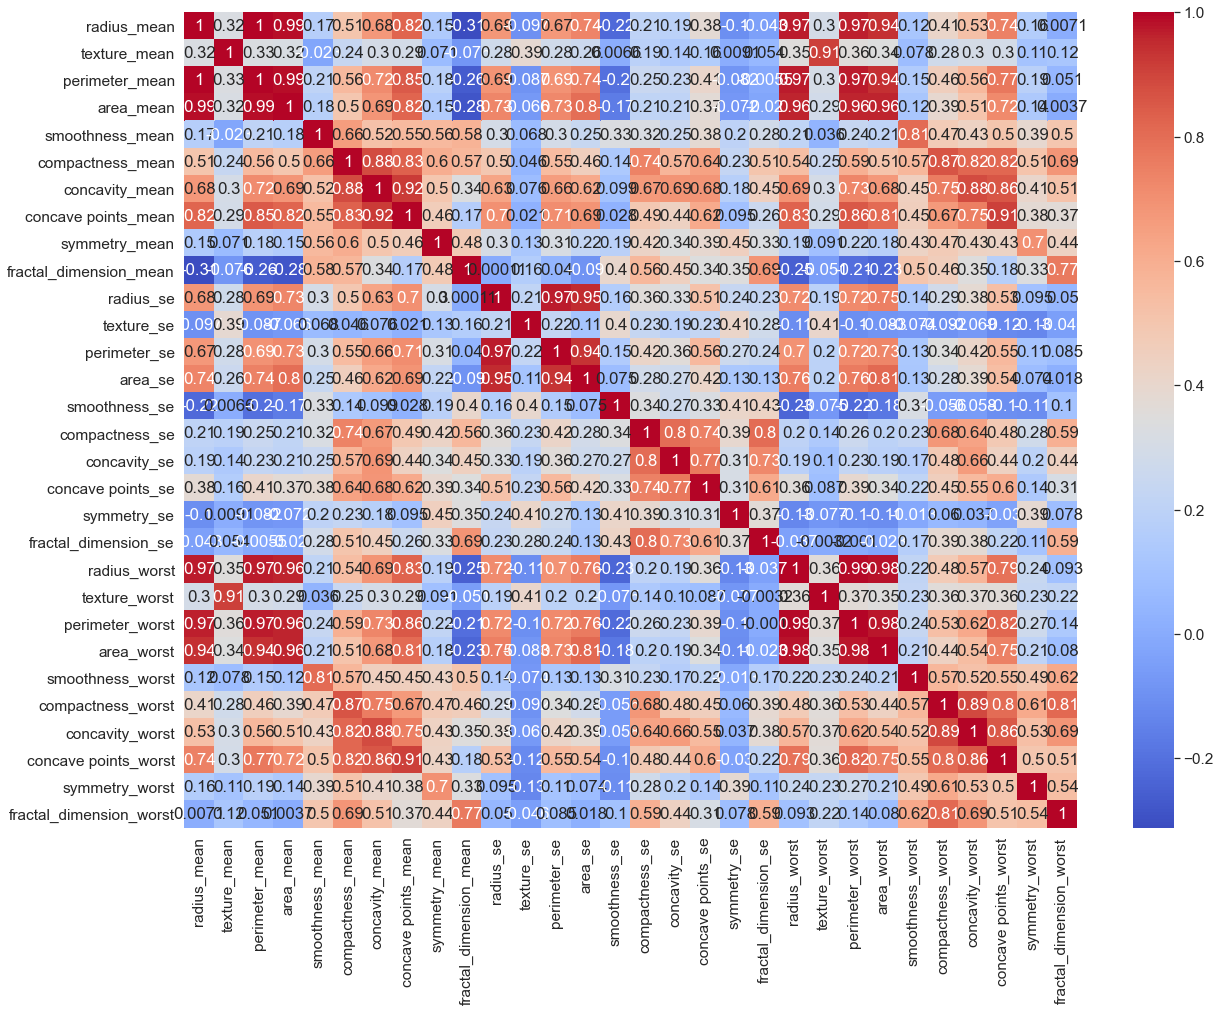

In [12]:
#Explore correlations
plt.rcParams['figure.figsize']=(12,8)
plt.figure(figsize=(20,15))
s.set(font_scale=1.4)
s.heatmap(df.drop('diagnosis', axis=1).drop('id',axis=1).corr(), annot=True,cmap='coolwarm')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

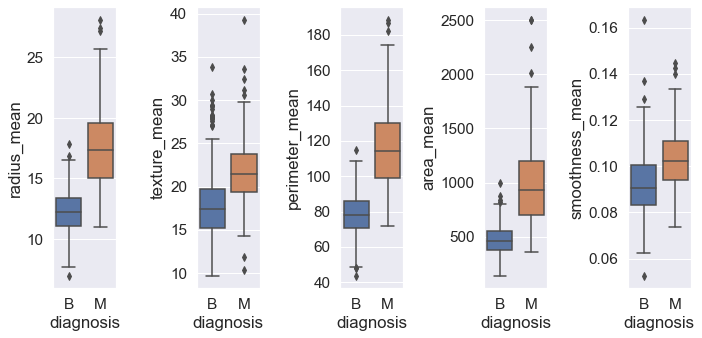

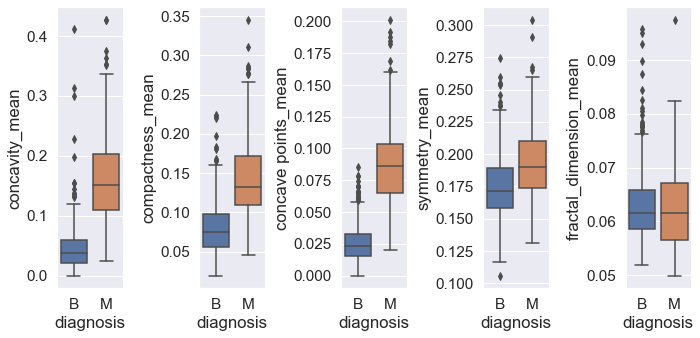

In [13]:
plt.rcParams['figure.figsize']=(10,5)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='radius_mean',data=df, ax=ax1)
s.boxplot('diagnosis',y='texture_mean',data=df, ax=ax2)
s.boxplot('diagnosis',y='perimeter_mean',data=df, ax=ax3)
s.boxplot('diagnosis',y='area_mean',data=df, ax=ax4)
s.boxplot('diagnosis',y='smoothness_mean',data=df, ax=ax5)
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='compactness_mean',data=df, ax=ax2)
s.boxplot('diagnosis',y='concavity_mean',data=df, ax=ax1)
s.boxplot('diagnosis',y='concave points_mean',data=df, ax=ax3)
s.boxplot('diagnosis',y='symmetry_mean',data=df, ax=ax4)
s.boxplot('diagnosis',y='fractal_dimension_mean',data=df, ax=ax5)    
f.tight_layout()

In [ ]:
g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-pack

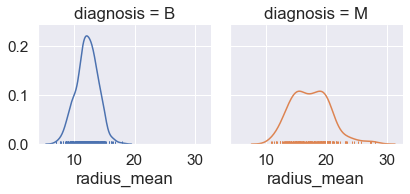

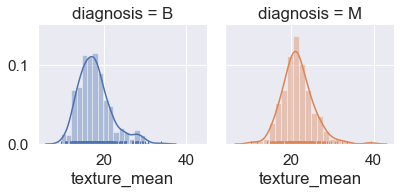

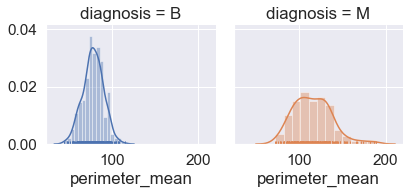

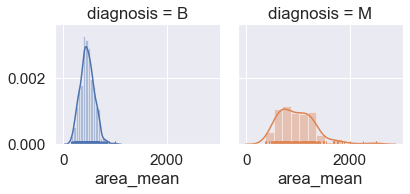

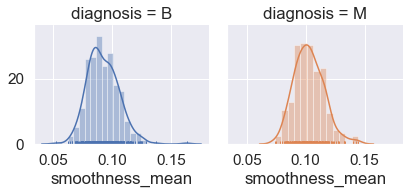

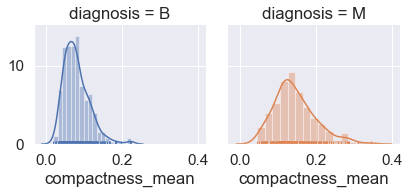

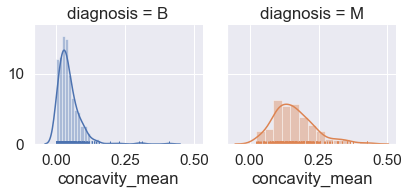

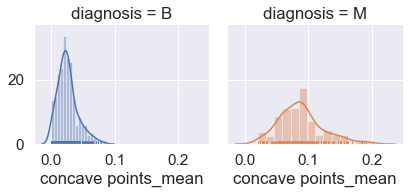

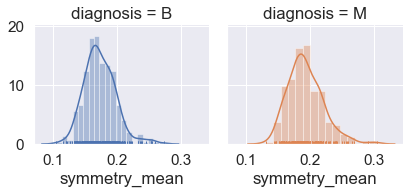

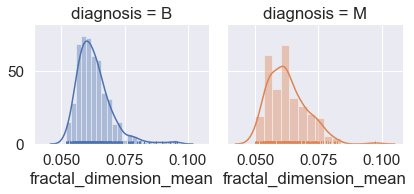

In [17]:
g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "radius_mean", hist=False, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "texture_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "perimeter_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "area_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "smoothness_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "compactness_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "concavity_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "concave points_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "symmetry_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "fractal_dimension_mean", hist=True, rug=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

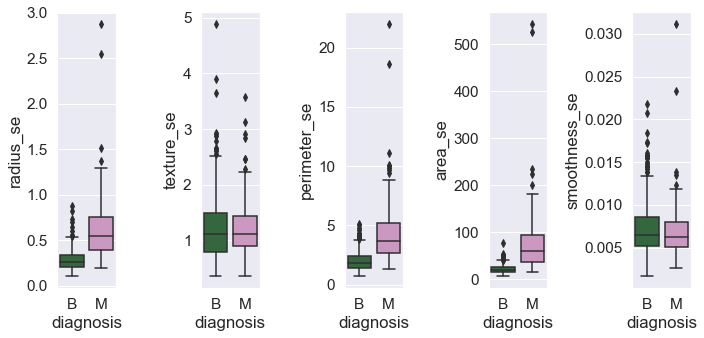

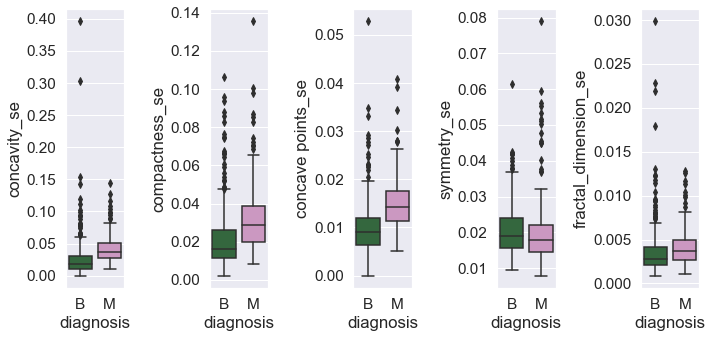

In [20]:


#%%
plt.rcParams['figure.figsize']=(10,5)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='radius_se',data=df, ax=ax1, palette='cubehelix')
s.boxplot('diagnosis',y='texture_se',data=df, ax=ax2, palette='cubehelix')
s.boxplot('diagnosis',y='perimeter_se',data=df, ax=ax3, palette='cubehelix')
s.boxplot('diagnosis',y='area_se',data=df, ax=ax4, palette='cubehelix')
s.boxplot('diagnosis',y='smoothness_se',data=df, ax=ax5, palette='cubehelix')
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='compactness_se',data=df, ax=ax2, palette='cubehelix')
s.boxplot('diagnosis',y='concavity_se',data=df, ax=ax1, palette='cubehelix')
s.boxplot('diagnosis',y='concave points_se',data=df, ax=ax3, palette='cubehelix')
s.boxplot('diagnosis',y='symmetry_se',data=df, ax=ax4, palette='cubehelix')
s.boxplot('diagnosis',y='fractal_dimension_se',data=df, ax=ax5, palette='cubehelix')    
f.tight_layout()



/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

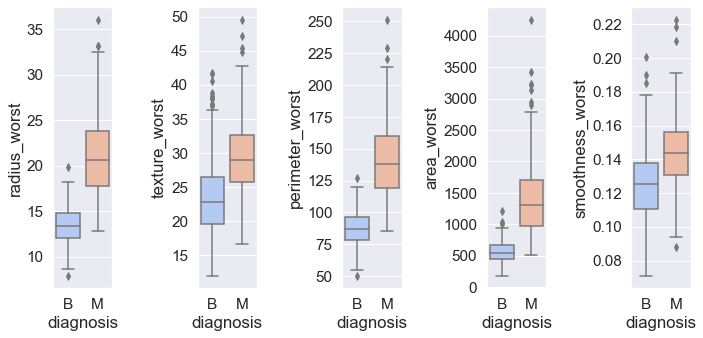

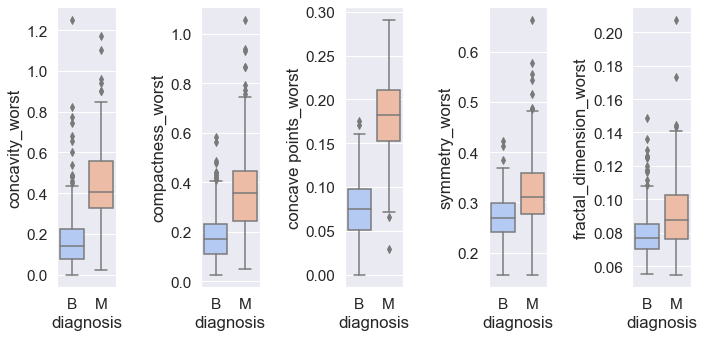

In [21]:
plt.rcParams['figure.figsize']=(10,5)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='radius_worst',data=df, ax=ax1, palette='coolwarm')
s.boxplot('diagnosis',y='texture_worst',data=df, ax=ax2, palette='coolwarm')
s.boxplot('diagnosis',y='perimeter_worst',data=df, ax=ax3, palette='coolwarm')
s.boxplot('diagnosis',y='area_worst',data=df, ax=ax4, palette='coolwarm')
s.boxplot('diagnosis',y='smoothness_worst',data=df, ax=ax5, palette='coolwarm')
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='compactness_worst',data=df, ax=ax2, palette='coolwarm')
s.boxplot('diagnosis',y='concavity_worst',data=df, ax=ax1, palette='coolwarm')
s.boxplot('diagnosis',y='concave points_worst',data=df, ax=ax3, palette='coolwarm')
s.boxplot('diagnosis',y='symmetry_worst',data=df, ax=ax4, palette='coolwarm')
s.boxplot('diagnosis',y='fractal_dimension_worst',data=df, ax=ax5, palette='coolwarm')    
f.tight_layout()

In [22]:
X_norm = df_norm.drop(labels='diagnosis',axis=1)
Y_norm= df_norm['diagnosis']
col=X_norm.columns

le = LabelEncoder()
le.fit(Y_norm)

LabelEncoder()

In [23]:
Y_norm=le.transform(Y_norm)


In [24]:
Y_norm=pd.DataFrame(Y_norm)
Y_norm.tail()

,0
564,1
565,1
566,1
567,1
568,0


# Fittig model

In [25]:
# Functionalize model fittting

def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    print(pred)
    pickle.dump(grid_result,open(algo_name,'wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)

# SVC 

In [26]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(X_norm,Y_norm,'SVC_norm',SVC(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'C': 1, 'gamma': 1}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.93      1.00      0.96        39

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

Accuracy Score : 0.9736842105263158
Confusion Matrix : 
 [[72  3]
 [ 0 39]]


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.7s finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Random Forst

In [27]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_norm,Y_norm,'Random Forest',RandomForestClassifier(),param,cv=10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score : 0.9824561403508771
Confusion Matrix : 
 [[73  2]
 [ 0 39]]


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.1s finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
forest = RandomForestClassifier(n_estimators=100)
fit = forsest.firt(x_train, y_trian)
accuracy = 

In [28]:
np.random.seed(10)

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)


forest = RandomForestClassifier(n_estimators=1000)
fit = forest.fit(x_train, y_train)
accuracy = fit.score(x_test, y_test)
predict = fit.predict(x_test)
cmatrix = confusion_matrix(y_test, predict)

#--------------------------------------------------------------------------------------#
# Perform k fold cross-validation


print ('Accuracy of Random Forest: %s' % "{0:.2%}".format(accuracy))


Accuracy of Random Forest: 98.25%


In [29]:
#%%Feature importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("feature %s (%f)" % (list(X)[f], importances[indices[f]]))

Feature ranking:
feature id (0.152947)
feature radius_mean (0.118457)
feature texture_mean (0.118185)
feature perimeter_mean (0.107737)
feature area_mean (0.082782)
feature smoothness_mean (0.054592)
feature compactness_mean (0.047692)
feature concavity_mean (0.044663)
feature concave points_mean (0.039500)
feature symmetry_mean (0.038166)
feature fractal_dimension_mean (0.033723)
feature radius_se (0.017635)
feature texture_se (0.016159)
feature perimeter_se (0.015938)
feature area_se (0.012447)
feature smoothness_se (0.011327)
feature compactness_se (0.011148)
feature concavity_se (0.009726)
feature concave points_se (0.009464)
feature symmetry_se (0.006852)
feature fractal_dimension_se (0.006291)
feature radius_worst (0.006028)
feature texture_worst (0.005206)
feature perimeter_worst (0.004678)
feature area_worst (0.004499)
feature smoothness_worst (0.004328)
feature compactness_worst (0.004295)
feature concavity_worst (0.004213)
feature concave points_worst (0.004154)
feature symme

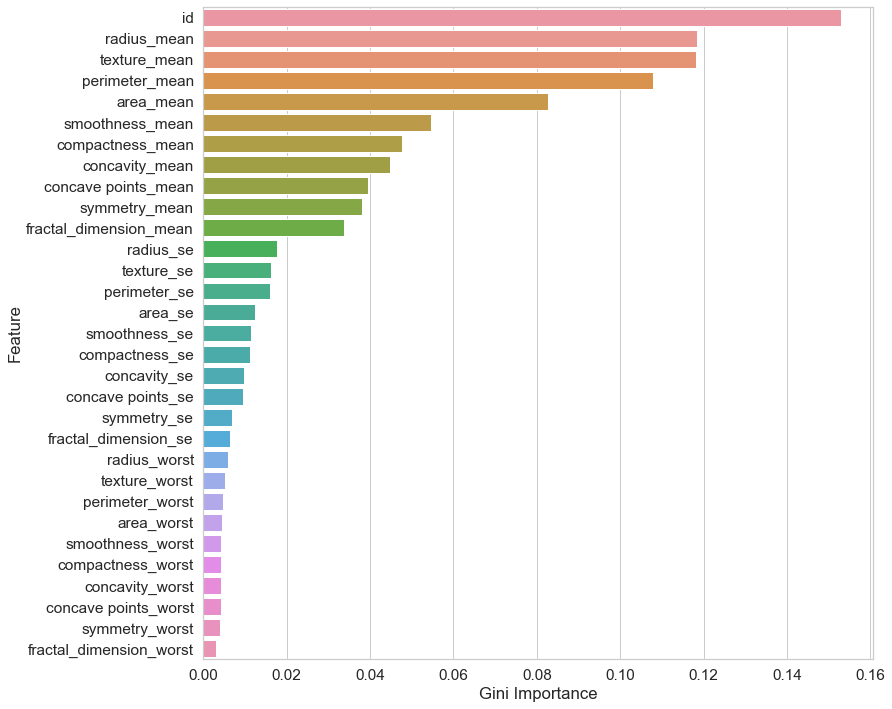

In [30]:
feat_imp = pd.DataFrame({'Feature':list(X),
                        'Gini importance':importances[indices]})
plt.rcParams['figure.figsize']=(12,12)
s.set_style('whitegrid')
ax = s.barplot(x='Gini importance', y='Feature', data=feat_imp)
ax.set(xlabel='Gini Importance')
plt.show()

# XGBoost

In [35]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_norm,Y_norm,'XGBoost_norm',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.7s finished
/Users/SN/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[16:15:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score : 0.9736842105263158
Confusion Matrix : 
 [[73  2]
 [ 1 38]]


In [34]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_res,Y_res,'XGBoost_norm',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    6.3s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.4s finished
/Users/SN/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[16:14:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.99      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score : 0.993006993006993
Confu

In [31]:
from imblearn.over_sampling import SMOTE

# piccle

In [36]:
sm =SMOTE(random_state=42)
X_res , Y_res = sm.fit_resample(X_norm,Y_norm)

In [41]:
loaded_model = pickle.load(open("XGBoost_norm","rb"))

EOFError: Ran out of input

In [42]:

pred1 = loaded_model.predict(x_test)
loaded_model.best_params_

{'n_estimators': 500}